In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [2]:
train_data = pd.read_csv('/Users/aga/Desktop/brainhack/selected_train.csv', sep=',')
val_data = pd.read_csv('/Users/aga/Desktop/brainhack/selected_validation.csv', sep=',')

In [3]:
labels_train_filename = '/Users/aga/Desktop/brainhack/training_fluid_intelligenceV1.csv'
labels_val_filename = '/Users/aga/Desktop/brainhack/validation_fluid_intelligenceV1.csv'
labels_train = pd.read_csv(labels_train_filename, sep=',')
labels_val = pd.read_csv(labels_val_filename, sep=',')

In [4]:
train_data.head()

,Unnamed: 0,subjectkey,sri24frontalsuplgm,sri24frontalsuprgm,sri24frontalsuporblgm,sri24frontalsuporbrgm,sri24frontalmidlgm,sri24frontalmidrgm,sri24frontalmidorblgm,sri24frontalmidorbrgm,...,sri24frontalinforblgm,sri24frontalinforbrgm,sri24frontalmedorblgm,sri24frontalmedorbrgm,sri24cingulumantlgm,sri24cingulumantrgm,sri24cingulummidlgm,sri24cingulummidrgm,gender_F,gender_M
0,3190,NDAR_INV007W6H7B,11608.2,10292.9,1728.07,2551.04,14212.1,16382.9,3266.63,3515.72,...,6735.91,5800.48,3072.09,2723.33,4235.04,4777.53,6395.13,7490.97,0,1
1,3020,NDAR_INV00CY2MDM,12302.6,11765.0,2520.28,2607.39,16888.4,19027.7,3978.52,3822.51,...,6643.10,5948.38,2642.61,2877.07,5346.31,4512.14,7001.95,6285.88,0,1
2,390,NDAR_INV00HEV6HB,11229.8,10384.5,2411.15,2160.34,18548.3,18598.8,3927.01,4597.59,...,7109.42,7357.31,3120.80,3785.27,4271.38,4437.63,5781.24,6552.67,0,1
3,1431,NDAR_INV00LJVZK2,13261.8,10869.4,2688.43,2236.71,15229.9,16650.1,4104.68,4826.16,...,7519.14,6390.69,3671.06,3524.43,4192.99,4628.82,7029.24,7318.81,0,1
4,4028,NDAR_INV00NPMHND,11329.6,10342.0,2373.23,2224.30,13785.5,17434.4,4764.47,4751.08,...,7308.55,5841.64,2897.32,3019.39,6284.10,5529.26,6997.10,7596.34,1,0


In [5]:
train_data_labels = pd.merge(train_data, labels_train, left_on='subjectkey', right_on='subject').drop(['subject'], axis=1)
val_data_labels = pd.merge(val_data, labels_val, left_on='subjectkey', right_on='subject').drop(['subject'], axis=1)

In [9]:
val_data_labels.head()

,Unnamed: 0,subjectkey,sri24frontalsuplgm,sri24frontalsuprgm,sri24frontalsuporblgm,sri24frontalsuporbrgm,sri24frontalmidlgm,sri24frontalmidrgm,sri24frontalmidorblgm,sri24frontalmidorbrgm,...,sri24frontalinforbrgm,sri24frontalmedorblgm,sri24frontalmedorbrgm,sri24cingulumantlgm,sri24cingulumantrgm,sri24cingulummidlgm,sri24cingulummidrgm,gender_F,gender_M,residual_fluid_intelligence_score
0,6277,NDAR_INV01NAYMZH,12819.6,11573.1,2480.65,2215.69,14769.7,19492.6,4478.14,3272.75,...,6522.69,2758.58,3402.33,6101.05,5246.06,6667.33,7254.61,0,1,-9.362391
1,2781,NDAR_INV042UJKFB,13366.6,11536.7,2045.95,2039.70,17235.7,18030.4,4634.04,4233.67,...,6526.34,3127.80,3762.69,5919.02,5160.92,7765.67,8256.16,1,0,-6.568116
2,1735,NDAR_INV08AT7TLH,13707.3,12057.9,2530.19,2364.27,17701.4,14865.8,4799.00,4048.79,...,6194.98,3843.62,4338.03,4399.79,5093.72,5920.16,6665.40,1,0,-14.810930
3,6498,NDAR_INV0B7UGM1D,12537.5,11113.5,2682.93,1869.82,18387.6,15440.0,6239.46,4758.87,...,6264.96,2887.72,3936.13,7529.17,6320.48,7808.35,7817.18,1,0,-0.050626
4,1544,NDAR_INV0CP9XGTP,13734.3,11109.7,2782.17,1941.36,16243.8,17567.0,4553.81,3887.20,...,6721.84,3176.04,3529.34,6070.91,6095.99,7542.36,8056.55,1,0,-5.327854


In [10]:
val_data.head()

,Unnamed: 0,subjectkey,sri24frontalsuplgm,sri24frontalsuprgm,sri24frontalsuporblgm,sri24frontalsuporbrgm,sri24frontalmidlgm,sri24frontalmidrgm,sri24frontalmidorblgm,sri24frontalmidorbrgm,...,sri24frontalinforblgm,sri24frontalinforbrgm,sri24frontalmedorblgm,sri24frontalmedorbrgm,sri24cingulumantlgm,sri24cingulumantrgm,sri24cingulummidlgm,sri24cingulummidrgm,gender_F,gender_M
0,6277,NDAR_INV01NAYMZH,12819.6,11573.1,2480.65,2215.69,14769.7,19492.6,4478.14,3272.75,...,8796.59,6522.69,2758.58,3402.33,6101.05,5246.06,6667.33,7254.61,0,1
1,2781,NDAR_INV042UJKFB,13366.6,11536.7,2045.95,2039.70,17235.7,18030.4,4634.04,4233.67,...,7017.15,6526.34,3127.80,3762.69,5919.02,5160.92,7765.67,8256.16,1,0
2,1735,NDAR_INV08AT7TLH,13707.3,12057.9,2530.19,2364.27,17701.4,14865.8,4799.00,4048.79,...,6334.33,6194.98,3843.62,4338.03,4399.79,5093.72,5920.16,6665.40,1,0
3,6498,NDAR_INV0B7UGM1D,12537.5,11113.5,2682.93,1869.82,18387.6,15440.0,6239.46,4758.87,...,6334.04,6264.96,2887.72,3936.13,7529.17,6320.48,7808.35,7817.18,1,0
4,1544,NDAR_INV0CP9XGTP,13734.3,11109.7,2782.17,1941.36,16243.8,17567.0,4553.81,3887.20,...,7868.52,6721.84,3176.04,3529.34,6070.91,6095.99,7542.36,8056.55,1,0


In [11]:
#remove keys
#todo: prepare training without residuals already; ,'residual_fluid_intelligence_score'
train_data = train_data.drop(['Unnamed: 0','subjectkey'],axis=1)
val_data = val_data.drop(['Unnamed: 0','subjectkey'],axis=1)

In [12]:
train_data.values.astype(np.float)
val_data.values.astype(np.float)

array([[1.28196e+04, 1.15731e+04, 2.48065e+03, ..., 7.25461e+03,
        0.00000e+00, 1.00000e+00],
       [1.33666e+04, 1.15367e+04, 2.04595e+03, ..., 8.25616e+03,
        1.00000e+00, 0.00000e+00],
       [1.37073e+04, 1.20579e+04, 2.53019e+03, ..., 6.66540e+03,
        1.00000e+00, 0.00000e+00],
       ...,
       [1.26580e+04, 1.29027e+04, 2.14588e+03, ..., 7.13861e+03,
        1.00000e+00, 0.00000e+00],
       [1.10539e+04, 1.05739e+04, 2.40168e+03, ..., 5.37929e+03,
        1.00000e+00, 0.00000e+00],
       [1.19228e+04, 1.14636e+04, 2.24852e+03, ..., 7.25328e+03,
        0.00000e+00, 1.00000e+00]])

In [13]:
#first normalize with respect to column
def normalize_data(data: np.array, standardize=True):
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0)
    if not standardize:
        return data-means
    return (data-means)/stds

In [14]:
train_norm_data = normalize_data(train_data)
val_norm_data = normalize_data(val_data)

In [15]:
train_norm_data[np.isnan(train_norm_data)] = 0

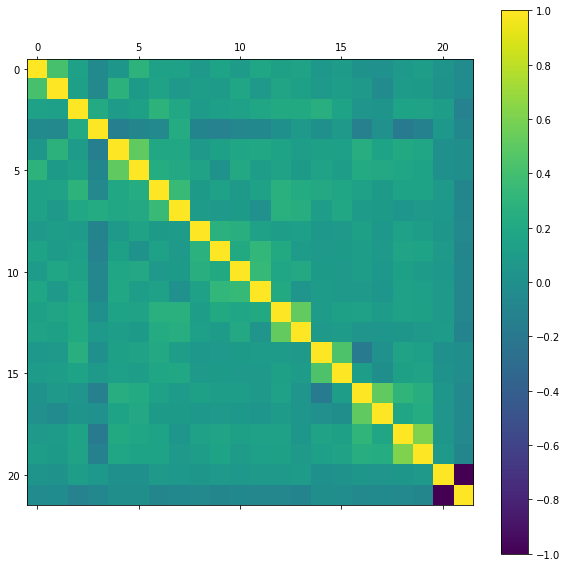

In [16]:
import matplotlib.pyplot as plt 
%matplotlib inline
#Covariance matrix of features
def compute_covariance(matrix):
    return matrix.T.dot(matrix)/matrix.shape[0]

cov_matrix = compute_covariance(train_norm_data)
fig, ax = plt.subplots(figsize=(10,10))
im = ax.matshow(cov_matrix, interpolation='none')
fig.colorbar(im, ticks=[-1,-0.8,-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])
plt.show()

In [17]:
from sklearn.decomposition import PCA

In [18]:
#PCA
n_components = [2,3,4,5,6,7,8,9,10]
for n in n_components:
    curr_pca = PCA(n_components=n)
    curr_pca.fit_transform(train_norm_data)
    print("For {} components, the explained variance by them is : {:.3f}".format(n, np.sum(curr_pca.explained_variance_ratio_)))

print("*"*10)
explained_variance = [0.8, 0.85, 0.9, 0.95]
for target_variance in explained_variance:
    curr_pca = PCA(n_components=target_variance)
    curr_pca.fit_transform(train_norm_data)
    print("The {} variance ratio is explained by {} components ".format(target_variance, np.sum(curr_pca.n_components_)))

For 2 components, the explained variance by them is : 0.266
For 3 components, the explained variance by them is : 0.350
For 4 components, the explained variance by them is : 0.419
For 5 components, the explained variance by them is : 0.482
For 6 components, the explained variance by them is : 0.540
For 7 components, the explained variance by them is : 0.591
For 8 components, the explained variance by them is : 0.637
For 9 components, the explained variance by them is : 0.680
For 10 components, the explained variance by them is : 0.721
**********
The 0.8 variance ratio is explained by 13 components 
The 0.85 variance ratio is explained by 14 components 
The 0.9 variance ratio is explained by 16 components 
The 0.95 variance ratio is explained by 18 components 


In [19]:
#Covariance matrix of features
def get_eigenvalues(data, n_comps, standardize=True):
    normalized_data = normalize_data(data, standardize)
    cov_matrix = compute_covariance(normalized_data)
    pca = PCA(n_comps)
    pca.fit_transform(normalized_data)
    eigenvectors = pca.components_
    eigenvalues = []
    for ev in eigenvectors:
        eigenvalues.append(np.dot(ev.T, np.dot(cov_matrix, ev)))
    print(pca.explained_variance_)
    return eigenvalues

In [20]:
#norm?
get_eigenvalues(train_norm_data, 3)

[3.82318309 2.03110896 1.85643542]


[3.822160821329398, 2.030689572494647, 1.8559600913119383]

/Users/aga/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


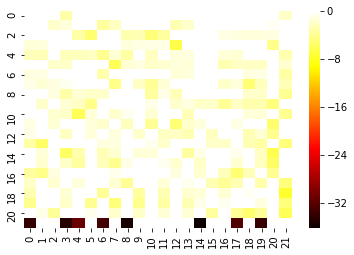

In [21]:
#Evaluating feature importance¶
inv_pca = PCA()
pca_data = inv_pca.fit_transform(train_norm_data)

feature_importance = np.nan_to_num(np.log(inv_pca.inverse_transform(np.eye(train_norm_data.shape[1]))))

import seaborn as sns
sns.heatmap(feature_importance, cmap="hot", cbar=True)

No handles with labels found to put in legend.


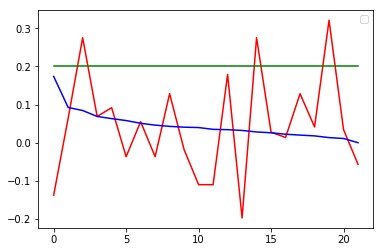

In [43]:
means = np.mean(pca_data, axis=0)/np.sum(np.mean(pca_data, axis=0))
variances = np.var(pca_data, axis=0)/np.sum(np.var(pca_data, axis=0))
xs = [x for x in range(train_norm_data.shape[1])]
threshold = [0.2 for x in xs]
plt.plot(xs, means, color='red')
plt.plot(xs, variances, color='blue')
plt.plot(xs, threshold, color='green')
plt.legend(loc='best')
plt.show()

In [23]:
#SVM
def mse(real, pred):
    return np.mean(np.square(real-pred))

In [28]:
train_data_labels=train_data_labels.drop(['Unnamed: 0','subjectkey'],axis=1)
val_data_labels=val_data_labels.drop(['Unnamed: 0','subjectkey'],axis=1)

In [29]:
val_data_labels.head()

,sri24frontalsuplgm,sri24frontalsuprgm,sri24frontalsuporblgm,sri24frontalsuporbrgm,sri24frontalmidlgm,sri24frontalmidrgm,sri24frontalmidorblgm,sri24frontalmidorbrgm,sri24frontalinfoperlgm,sri24frontalinfoperrgm,...,sri24frontalinforbrgm,sri24frontalmedorblgm,sri24frontalmedorbrgm,sri24cingulumantlgm,sri24cingulumantrgm,sri24cingulummidlgm,sri24cingulummidrgm,gender_F,gender_M,residual_fluid_intelligence_score
0,12819.6,11573.1,2480.65,2215.69,14769.7,19492.6,4478.14,3272.75,3533.34,4958.68,...,6522.69,2758.58,3402.33,6101.05,5246.06,6667.33,7254.61,0,1,-9.362391
1,13366.6,11536.7,2045.95,2039.70,17235.7,18030.4,4634.04,4233.67,5042.37,4462.35,...,6526.34,3127.80,3762.69,5919.02,5160.92,7765.67,8256.16,1,0,-6.568116
2,13707.3,12057.9,2530.19,2364.27,17701.4,14865.8,4799.00,4048.79,4227.79,5267.65,...,6194.98,3843.62,4338.03,4399.79,5093.72,5920.16,6665.40,1,0,-14.810930
3,12537.5,11113.5,2682.93,1869.82,18387.6,15440.0,6239.46,4758.87,4619.97,5280.84,...,6264.96,2887.72,3936.13,7529.17,6320.48,7808.35,7817.18,1,0,-0.050626
4,13734.3,11109.7,2782.17,1941.36,16243.8,17567.0,4553.81,3887.20,3849.93,3606.50,...,6721.84,3176.04,3529.34,6070.91,6095.99,7542.36,8056.55,1,0,-5.327854


In [30]:
train_labels = train_data_labels['residual_fluid_intelligence_score'].astype(np.float)
val_labels = val_data_labels['residual_fluid_intelligence_score'].astype(np.float)

In [38]:
from sklearn.svm import SVR 

svr = SVR()
svr.fit(train_norm_data, train_labels)

preds = svr.predict(normalize_data(val_data))

In [39]:
mse(preds, val_labels)

72.6730722510812

In [33]:
svr.score(normalize_data(val_data), val_labels)

-0.016048043050734373

In [34]:
#random baseline
random_labels = np.random.normal(np.mean(train_labels), np.std(train_labels), len(val_labels))
mse(random_labels, val_labels)

173.6183939802302

In [35]:
#majority baseline
majority_labels = [np.mean(train_labels) for x in range(len(val_labels))]
mse(majority_labels, val_labels)

71.83710478844854